# MPMS Results on DX1-1r
FC-ZFC-RT-SIRM

Frequency dependency of Xusceptibility

DX1-1R-FC-ZFC-RT-SIRM-AC_sweep.dat -- data file

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
##Sample mass in kg
mass = 0.188*0.001 #TODO: change this for DX1-1r

In [3]:
## Frequency values 
freqs = [1.000576 , 5.316651 , 28.257017, 150.471878, 800.461121]


In [4]:
## Row numbers 
m_start = 47
FC_start = 47
ZFC_start = 107
RT_SIRM_cool_start = 168
RT_SIRM_warm_start = 226
X_start = 1215
X_end = 1509

n_freq = 5 ##number of different frequencies used

In [5]:
##Attempt no1 to not have to hard code in row shift

#start_numbers =  [FC_start, ZFC_start, RT_SIRM_cool_start, RT_SIRM_warm_start, X_start]
#for start_number in start_numbers:
#    start_number = start_number - 47
#    print(start_number)


In [6]:
##Attempt no2 to not have to hard code in row shift

##row_numbers = pd.DataFrame([47, 47, 337, 627, 863, 1156], ['m_start', 'FC_start', 'ZFC_start', 'RT_SIRM_cool_start', 'RT_SIRM_warm_start','X_start'], ['excel_number'])
##row_numbers['df_number'] = row_numbers['excel_number'] - 47
##row_numbers
##row_numbers.iat[2,0]

In [7]:
pwd ##check we are in the same place as the data


'C:\\Users\\murray98\\Documents\\IRM summer school\\code\\IRM-Summer-School-2022'

In [8]:
##Read in data
df = pd.read_csv(r'C:\Users\murray98\Documents\IRM summer school\mpms_data-20220612T225342Z-001\mpms_data\DX1-1r-FC-ZFC-RT-SIRM-VSM-SWEEP.dat', sep=",", skiprows=44 )
print(df)

     Comment  Time Stamp (sec)  Temperature (K)  Magnetic Field (Oe)  \
0        NaN      3.863749e+09         9.999759            25.334381   
1        NaN      3.863749e+09        10.306988            25.334381   
2        NaN      3.863749e+09        15.124522            25.334381   
3        NaN      3.863749e+09        20.069038            25.334381   
4        NaN      3.863749e+09        25.056728            25.334381   
..       ...               ...              ...                  ...   
235      NaN      3.863758e+09       280.036285            25.371988   
236      NaN      3.863758e+09       285.123016            25.371988   
237      NaN      3.863758e+09       290.121796            25.371988   
238      NaN      3.863758e+09       295.004456            25.371988   
239      NaN      3.863758e+09       299.945953            25.371988   

     Moment (emu)  M. Std. Err. (emu)  Transport Action  Averaging Time (sec)  \
0        0.000592        1.038774e-07                 

In [9]:
##Convert to SI units
df['Moment (Am2/kg)'] = df['Moment (emu)'] /(1000*mass)

In [10]:
d = 47 ##number of rows shifted from the excel row numbers

FC_data = df.loc[FC_start -d : ZFC_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]
print('FC_data:')
print(FC_data)
ZFC_data = df.loc[ZFC_start-d : RT_SIRM_cool_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]
print('ZFC_data:')
print(ZFC_data)

RT_SIRM_cool_data = df.loc[RT_SIRM_cool_start-d : RT_SIRM_warm_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]

RT_SIRM_warm_data = df.loc[RT_SIRM_warm_start-d : X_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]



FC_data:
    Temperature (K)  Moment (Am2/kg)
0          9.999759         0.003147
1         10.306988         0.004191
2         15.124522         0.003387
3         20.069038         0.002083
4         25.056728         0.001352
5         30.031979         0.000849
6         35.051380         0.000479
7         40.067661         0.000323
8         45.048210         0.000278
9         50.011703         0.000272
10        55.080856         0.000268
11        60.020607         0.000264
12        65.014122         0.000260
13        70.054092         0.000257
14        75.179756         0.000254
15        80.089394         0.000250
16        85.024612         0.000247
17        90.041832         0.000244
18        95.001167         0.000238
19       100.009811         0.000232
20       105.120575         0.000226
21       110.118866         0.000221
22       115.020805         0.000217
23       120.022156         0.000215
24       125.147629         0.000213
25       130.009537         0

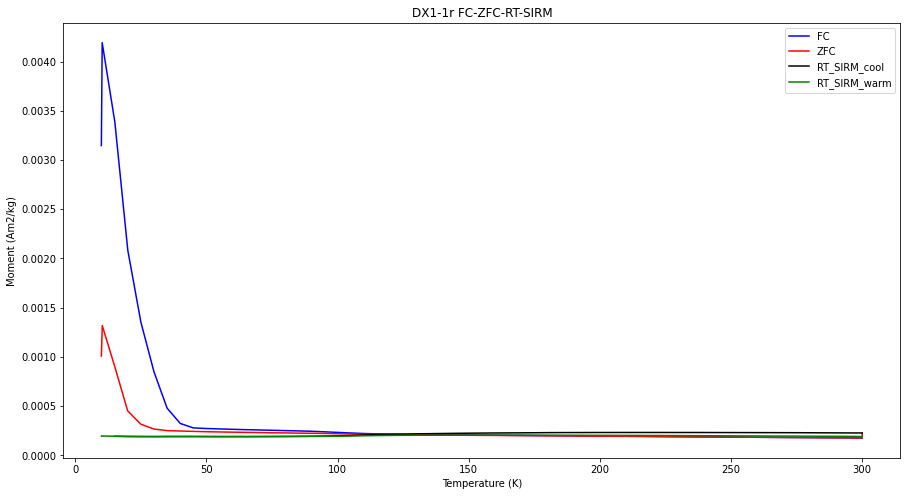

In [11]:
fig,ax = plt.subplots(figsize=(15,8))


ax.plot(FC_data["Temperature (K)"] , FC_data['Moment (Am2/kg)'], label = 'FC', color = 'blue')
ax.plot(ZFC_data["Temperature (K)"] , ZFC_data['Moment (Am2/kg)'], label = 'ZFC', color = 'red')
ax.plot(RT_SIRM_cool_data["Temperature (K)"] , RT_SIRM_cool_data['Moment (Am2/kg)'], label = 'RT_SIRM_cool', color='black')
ax.plot(RT_SIRM_warm_data["Temperature (K)"] , RT_SIRM_warm_data['Moment (Am2/kg)'], label = 'RT_SIRM_warm', color='green')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Moment (Am2/kg)')
ax.set_title('DX1-1r FC-ZFC-RT-SIRM')

ax.legend()


##Observations

FC starts above ZFC (0.0037 vs 0.0032 Am2/kg) 

Both drop steeply from 0K to 120K 

ZFC changes slope at 30K, shallows then steeper drop at 120K, 

These temperatures can be quantified by taking derivatives from the slopes. 

RT_SIRM_cool is much higher than the RT_SIRM_warm at high temperatures (above 100K) 
RT_SIRM_warm flattens off 


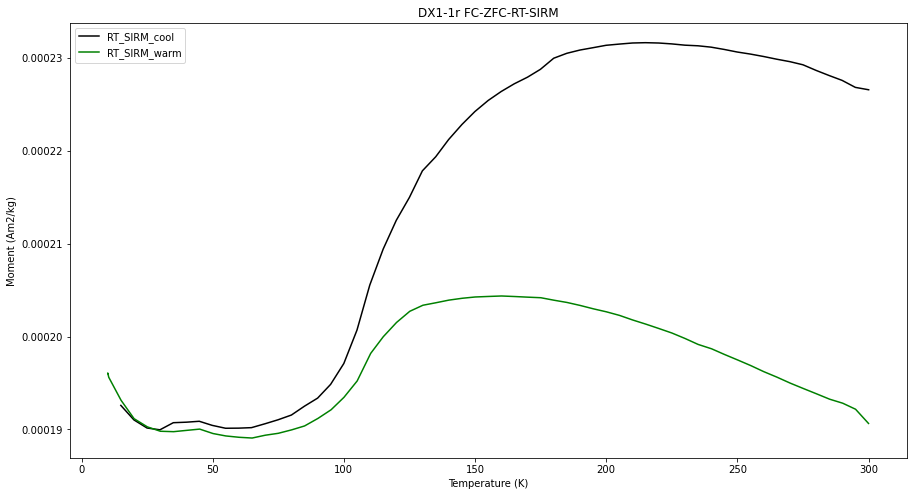

In [12]:
fig,ax = plt.subplots(figsize=(15,8))



ax.plot(RT_SIRM_cool_data["Temperature (K)"] , RT_SIRM_cool_data['Moment (Am2/kg)'], label = 'RT_SIRM_cool', color='black')
ax.plot(RT_SIRM_warm_data["Temperature (K)"] , RT_SIRM_warm_data['Moment (Am2/kg)'], label = 'RT_SIRM_warm', color='green')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Moment (Am2/kg)')
ax.set_title('DX1-1r FC-ZFC-RT-SIRM')

ax.legend()

## Frequency dependence of AC susceptibility 

In [13]:
##Split out section for freq dependence of AC susceptibility
X_data = df.loc[(X_start - m_start):, ['Temperature (K)','AC Susceptibility (emu/Oe)', 'AC Frequency (Hz)']]
print(X_data)

Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz)]
Index: []


In [14]:
##Make my life 4 letters easier
pi = math.pi
pi

3.141592653589793

In [15]:
## Convert from CGS to SI and normalise by mass
X_data['AC Susceptibility (m3/kg)'] = X_data['AC Susceptibility (emu/Oe)'] * 4 * pi * 1e-6 /mass
X_data.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []>

<AxesSubplot:xlabel='Temperature (K)', ylabel='AC Susceptibility (m3/kg)'>

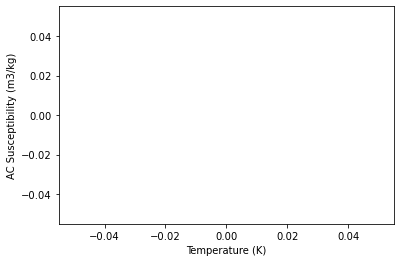

In [16]:
##Plot all data together
X_data.plot.scatter(x="Temperature (K)", y='AC Susceptibility (m3/kg)')

In [17]:
##Neater way of doing the same thing as below to split the data by frequency, unfinished

##freqs = [2, 6, 29, 151, 801]
##i=0
##for freq in freqs:
  ##  mask = X_data['AC Frequency (Hz)'] <= freq
  ##  X_freq = X_data[mask]
  ##  X_freq_rest = X_freq[~mask]
  ##  print(X_freq)

In [18]:
mask = X_data['AC Frequency (Hz)'] <= (freqs[0]+1)
X_freq1 = X_data[mask]
print(X_freq1)

X_freq_1 = X_data[~mask]
print (X_freq_1)

Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []
Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []


In [19]:
mask2 = (X_data['AC Frequency (Hz)'] < (freqs[1]+1)) 
X_freq2 = X_freq_1[mask2]
print(X_freq2)
X_freq_2 = X_freq_1[~mask2]
print(X_freq_2)

Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []
Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []


In [20]:
mask3 = (X_data['AC Frequency (Hz)'] < (freqs[2]+1)) 
X_freq3 = X_freq_2[mask3]
print(X_freq3)
X_freq_3 = X_freq_2[~mask3]
print(X_freq_3)

Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []
Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []


In [21]:
mask4 = (X_data['AC Frequency (Hz)'] < (freqs[3]+1)) 
X_freq4 = X_freq_3[mask4]
print(X_freq4)
X_freq_4 = X_freq_3[~mask4]
print(X_freq_4)

Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []
Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []


In [22]:
X_freq5 = X_freq_4
print(X_freq5)

Empty DataFrame
Columns: [Temperature (K), AC Susceptibility (emu/Oe), AC Frequency (Hz), AC Susceptibility (m3/kg)]
Index: []


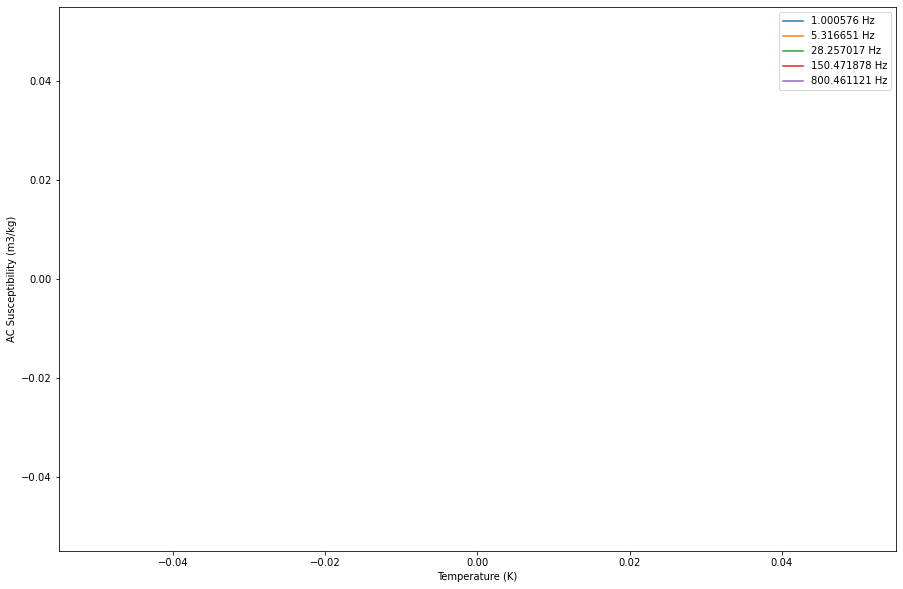

In [23]:
fig,ax = plt.subplots(figsize=(15,10))


ax.plot(X_freq1["Temperature (K)"] , X_freq1['AC Susceptibility (m3/kg)'], label = f'{freqs[0]} Hz')
ax.plot(X_freq2["Temperature (K)"] , X_freq2['AC Susceptibility (m3/kg)'], label = f'{freqs[1]} Hz')
ax.plot(X_freq3["Temperature (K)"] , X_freq3['AC Susceptibility (m3/kg)'], label = f'{freqs[2]} Hz')
ax.plot(X_freq4["Temperature (K)"] , X_freq4['AC Susceptibility (m3/kg)'], label = f'{freqs[3]} Hz')
ax.plot(X_freq5["Temperature (K)"] , X_freq5['AC Susceptibility (m3/kg)'], label = f'{freqs[4]} Hz')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('AC Susceptibility (m3/kg)')

ax.legend()


##Observations 

NOTE: 800Hz freq has measured incorrectly

All curves: steep drop down to 40K increases to 120K slow drop to 300K 
At all T, susceptibility is lower for higher frequencies - check this is true for all sections of the graph.

